# 스팸 메일 분류

In [1]:
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin1')

In [6]:
# 총 데이터 수 확인
print(data.shape)

# 데이터 5행 출력
data.head(5)

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
# 필요없는 컬럼 삭제 및 레이블 매핑
target = data['v1']
train = data['v2']

In [17]:
# 결측치 확인


<bound method Series.isna of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object>

In [25]:
train

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [26]:
# 중복된 데이터가 있는지 확인(고유한 데이터와 전체 데이터 개수 비교)
len(train.unique())

5169

In [24]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(['v2'],inplace=True)
target = data['v1']
train = data['v2']
# 총 데이터 수 출력

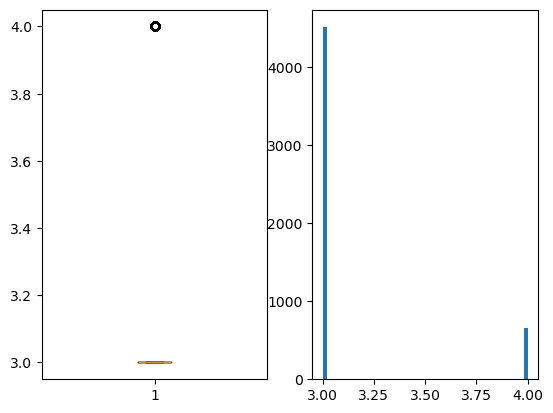

In [27]:
# 데이터 분포 확인
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence



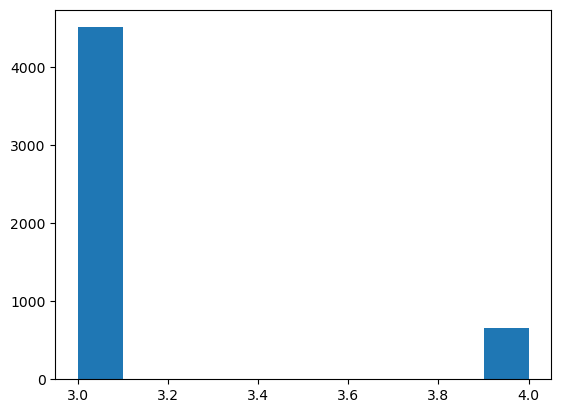

In [28]:
# 정상 메일과 스팸 메일의 비율 비교
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence


plt.hist([len(x) for x in target])
plt.show()

레이블이 굉장히 불균형하기 때문에 훈련 데이터와 테스트 데이터의 레이블 비율을 유지해서 분리

In [33]:
# X_data, y_data 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target, random_state=40)

In [34]:
# X_data와 y_data를 8:2 비율로 분할(stratify=y_data)

y_train

2294    spam
1193    spam
932      ham
625      ham
2748     ham
        ... 
3866     ham
1223     ham
2725     ham
1607     ham
2480    spam
Name: v1, Length: 4135, dtype: object

훈련 데이터의 비율


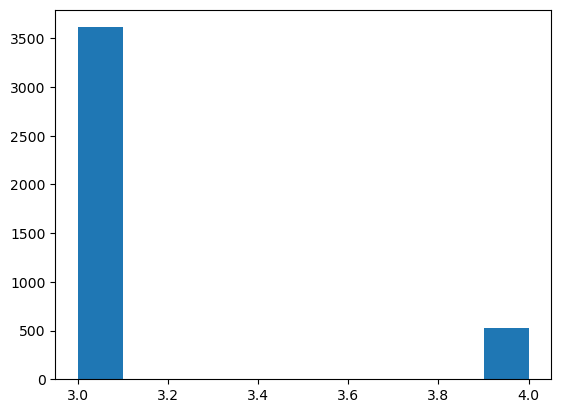

In [35]:
print('훈련 데이터의 비율')
plt.hist([len(x) for x in y_train])
plt.show()

테스트 데이터의 비율


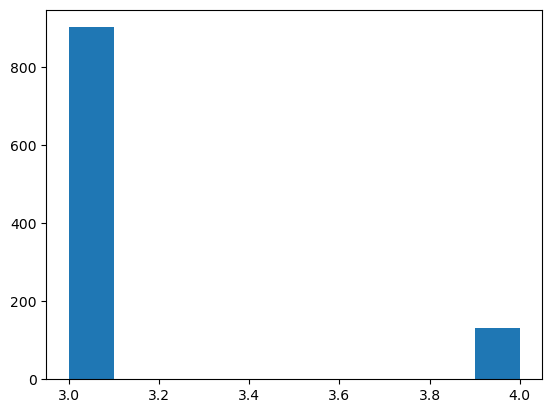

In [36]:
print('테스트 데이터의 비율')
plt.hist([len(x) for x in y_test])
plt.show()

In [83]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizer 객체 생성
tokenizer = Tokenizer()

# X_train에 존재하는 단어마다 부여될 숫자 계산
tokenizer.fit_on_texts(train)

# 단어 벡터화
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [84]:
# X_train_encoded 출력
print(X_train_encoded)

[[3, 16, 130, 101, 164, 102, 17, 6132], [869, 41, 40, 103, 36, 4, 53, 506, 659, 15, 1980, 34, 70, 160, 2, 2382, 56, 187, 327, 32, 4, 506, 3259, 3260, 274, 229, 44, 126, 653, 295, 922, 327, 5127], [23, 30, 3, 16, 4874, 4875, 253], [243, 58, 2, 379, 29, 3011, 1298, 7, 19, 5, 2305, 12, 124, 1276], [71, 215, 146, 7, 133, 92, 156, 181, 12, 161, 3, 165, 18, 2, 120, 55, 18, 49], [1490, 10, 2431, 86, 46, 3, 59, 2, 685], [18, 165, 26, 3, 70, 120, 73, 126, 62], [49, 409, 312, 330], [381, 292, 37, 255, 83, 19, 703, 284, 324, 72, 83, 20, 1285, 22, 62, 3500, 523, 2702, 44, 1913, 4, 3470, 88, 117, 579, 505, 233, 126, 1765, 2, 59], [2177, 706, 4233, 19, 11, 905, 848, 23, 1, 239], [45, 114, 1, 952, 2, 3, 181], [30, 6, 385, 32, 4, 947, 2522, 8, 13, 621, 12, 38, 858, 7, 14, 541, 47, 498, 509, 6, 772, 2, 14, 55, 244, 470], [139, 5, 206, 2605, 3613, 10, 227, 24, 163, 2, 3, 1, 26, 2877, 1985, 22, 1, 366, 131, 179, 3, 91, 1958, 14, 163], [8, 18, 848, 1, 320, 90, 81, 3, 27, 1452, 5124], [58, 38, 6951, 3805],

In [85]:
# mapping 된 단어 확인
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [86]:
# 단어 집합의 크기를, 전체 단어수+1로 지정
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8921


In [53]:
y_train.unique()

array(['spam', 'ham'], dtype=object)

메일의 최대 길이 : 189
메일의 평균 길이 : 15.580169


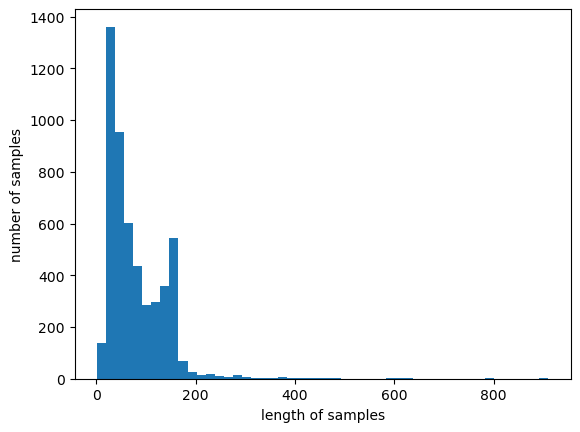

In [87]:
import matplotlib.pyplot as plt

print('메일의 최대 길이 : %d' % max(len(l) for l in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(s) for s in train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [57]:
target

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5169, dtype: object

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [88]:
# 메일의 최대 길이가 그리 크지 않기 때문에, 최대길이 사용하여 padding
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
maxlen = len([x for x in train])
X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=maxlen)
y_train_encoded = np.expand_dims(np.where(y_train=='spam',1,0),-1)

In [70]:
y_train_encoded.shape

(4135, 1)

# 스팸 메일 분류

In [131]:
# 모델 생성 및 컴파일
# 필요 라이브러리 import
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten, BatchNormalization, Dropout, Conv1D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint

# ModelCheckpoint 콜백 생성
model_checkpoint=ModelCheckpoint(filepath = 'best11_1.keras', monitor = 'val_accuracy', save_best_only = True, verbose=1)

# 모델 구성
model = Sequential()

model.add(Embedding(vocab_size, 64))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size= 4,activation = 'relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size= 2,activation = 'relu'))
model.add(Flatten())
# model.add(BatchNormalization())
# model.add(BatchNormalization())
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [107]:
# 모델 학습(history 저장)
history = model.fit(X_train_encoded, y_train_encoded, batch_size = 128 ,epochs = 20, validation_split=0.2, callbacks=[model_checkpoint])

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.8466 - loss: 0.4929
Epoch 1: val_accuracy improved from -inf to 0.88875, saving model to best11_1.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 666ms/step - accuracy: 0.8473 - loss: 0.4906 - val_accuracy: 0.8888 - val_loss: 0.4897
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.8734 - loss: 0.3764
Epoch 2: val_accuracy did not improve from 0.88875
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 651ms/step - accuracy: 0.8732 - loss: 0.3764 - val_accuracy: 0.8888 - val_loss: 0.3732
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.8712 - loss: 0.3483
Epoch 3: val_accuracy improved from 0.88875 to 0.95405, saving model to best11_1.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 654ms/step - accuracy: 0.8714 - loss: 0.3477 - val_accuracy: 0.9541 - val_loss: 0.2561
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9588 - loss: 0.1552
Epoch 4: val_accuracy improved from 0.95405 to 0.96252, saving model to best11_1

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer
# 단어 벡터화
X_test_encoded = tokenizer.texts_to_sequences(X_test)
# 메일의 최대 길이가 그리 크지 않기 때문에, 최대길이 사용하여 padding
import numpy as np 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
maxlen = len([x for x in train])
X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=maxlen)
y_test_encoded = np.expand_dims(np.where(y_test=='spam',1,0),-1)

model = load_model('best11_1.keras')

In [132]:
model = load_model('best11_1.keras')

In [133]:
# 테스트 정확도 출력
# 모델 평가
from sklearn.metrics import classification_report

# 실제 라벨과 예측 라벨
actual = y_test_encoded
predicted = model.predict(X_test_encoded)
predicted_labels = (predicted > 0.5).astype(int)

# classification_report 출력
report = classification_report(actual, predicted_labels, target_names=['Ham', 'Spam'])
print(report)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       903
        Spam       0.95      0.95      0.95       131

    accuracy                           0.99      1034
   macro avg       0.97      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034



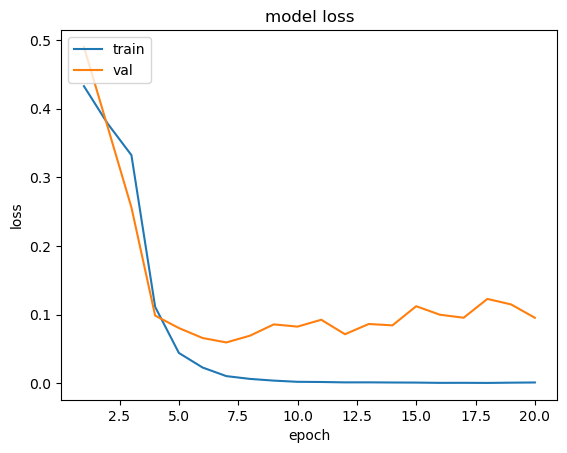

In [134]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Sample 1 Text: our will me y a movie a do video going 86688 i fri yijue out betta but apps aging country ask products s rofl accommodation
Sample 2 Text: much smokes me tell identifier love txt held sleeping yet fringe ic going distract mins dun
Sample 3 Text: should hear just so bathe from to 08718711108 for to lays repent


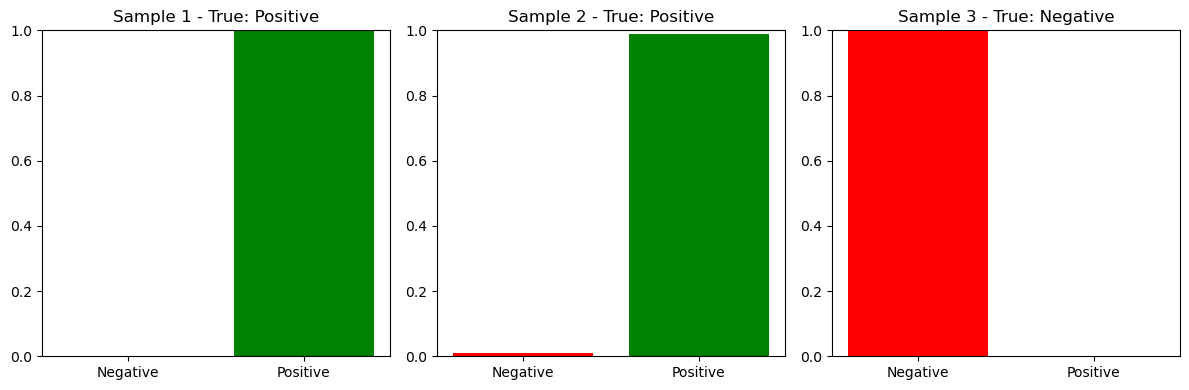

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# 단어 인덱스 로드 및 디코딩을 위한 사전 준비
word_index = tokenizer.word_index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 테스트 데이터에서 샘플 추출
indices = np.random.randint(0, len(X_test_encoded), size=3)
samples = X_test_encoded[indices]
predictions = model.predict(samples)
true_labels = y_test_encoded[indices]

# 샘플 텍스트 디코딩 함수
def decode_review(encoded_review):
    # 오프셋을 고려하여 단어를 가져오되, 매핑되지 않은 인덱스는 '?'로 표시
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i > 3])

# 시각화 및 텍스트 출력
plt.figure(figsize=(12, 4))
for i, (sample, prediction, label) in enumerate(zip(samples, predictions, true_labels)):
    plt.subplot(1, 3, i+1)
    plt.bar(['Negative', 'Positive'], [1-prediction[0], prediction[0]], color=['red', 'green'])
    plt.ylim(0, 1)
    plt.title(f'Sample {i+1} - True: {"Positive" if label else "Negative"}')

    # 디코딩된 샘플 텍스트 출력
    decoded_text = decode_review(sample)
    print(f'Sample {i+1} Text: {decoded_text}')

plt.tight_layout()
plt.show()